# Landauer-Büttiker calculation of current and noise of the eigenstates of H_{2pf}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as intg
import scipy.linalg as sla

plt.rcParams['text.usetex']=True
plt.rcParams['font.size']=26

In [10]:
# Definition of constants
phi = np.arctan(1/np.sqrt(27)) ### Phase of the PF coupling
lam = 2.4e3*2*np.pi ### Angular frequency measure in units of 1/{\mu}s
eps = lam ### PF overlap energy
Gam = lam/10  ### Measurement rate between lead and PF 1
beta = (3/lam) ### Inverse temperature
Vmax=7*lam ### Half width of voltage range
NV=700 ### Number that sets the resolution in voltage
tb=1e-1 ### The integration time in units of {\mu}s (t_avg in article) 
delnu=1/tb
v_ax=np.linspace(-Vmax,Vmax,NV+1)

In [3]:
Del0=4*eps*np.cos(phi)
Del1=4*eps*np.cos(4*np.pi/3+phi)
Del2=4*eps*np.cos(4*np.pi*2/3+phi)

In [4]:
def f(w,v):
    return 1/(1+np.exp(beta*(w-v)))

def g0(w):
    return ((w**2)*((2*Gam)**2))/((w**2-(Del0)**2)**2+(w**2)*((Gam*2)**2))

def g1(w):
    return ((w**2)*((2*Gam)**2))/((w**2-(Del1)**2)**2+(w**2)*((Gam*2)**2))

def g2(w):
    return ((w**2)*((2*Gam)**2))/((w**2-(Del2)**2)**2+(w**2)*((Gam*2)**2))

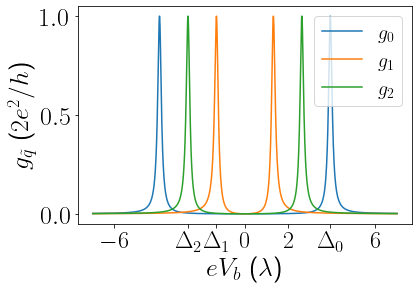

In [5]:
fig, ax = plt.subplots()
w_ax=np.linspace(-Vmax,Vmax,2000)
ax.set_xlabel(r'$eV_b$ ($\lambda$)')
ax.set_ylabel(r'$g_{\tilde{q}}$ ($2e^2/h$)')
ax.set_xticks(np.array([-6*lam,0,2*lam,6*lam,Del1,Del2,Del0]), labels=['$-6$', '$0$', '$2$', '$6$', r'$\Delta_1$', r'$\Delta_2$',r'$\Delta_0$'],fontsize=24)
ax.set_yticks(np.array([0,0.5,1]),fontsize=24)
plt.plot(w_ax,g0(w_ax),label='$g_0$')
plt.plot(w_ax,g1(w_ax),label='$g_1$')
plt.plot(w_ax,g2(w_ax),label='$g_2$')
plt.legend(loc='upper right',fontsize=20)
plt.show()

In [6]:
def G0(v):
    return intg.quad(lambda w: g0(w)*beta*f(w,v)*(1-f(w,v)),-20*lam,20*lam)

def G1(v):
    return intg.quad(lambda w: g1(w)*beta*f(w,v)*(1-f(w,v)),-20*lam,20*lam)

def G2(v):
    return intg.quad(lambda w: g2(w)*beta*f(w,v)*(1-f(w,v)),-20*lam,20*lam)

In [7]:
G0tab=[]
for k in range(NV+1):
    con = G0(-Vmax+2*k*Vmax/NV)
    G0tab.append(con)
    
G0arr=np.array(G0tab)

G1tab=[]
for k in range(NV+1):
    con = G1(-Vmax+2*k*Vmax/NV)
    G1tab.append(con)
    
G1arr=np.array(G1tab)

G2tab=[]
for k in range(NV+1):
    con = G2(-Vmax+2*k*Vmax/NV)
    G2tab.append(con)
    
G2arr=np.array(G2tab)

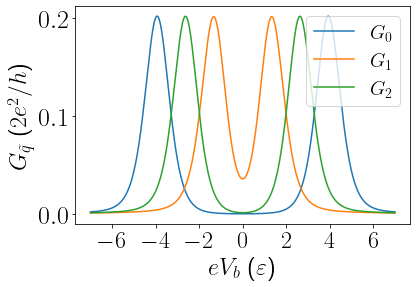

In [8]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$eV_b$ ($\varepsilon$)',fontsize=24)
ax.set_ylabel(r'$G_{\tilde{q}}$ ($2e^2/h$)',fontsize=24)
ax.set_xticks(np.array([-6*lam,-4*lam,-2*lam,0,2*lam,4*lam,6*lam]), labels=['$-6$','$-4$','$-2$','$0$','$2$','$4$','$6$'],fontsize=24) #ax.set_xticks(np.array([-6*lam,0,2*lam,6*lam,Del1,Del2,Del0]), labels=['$-6$','$0$','$2$','$6$', r'$\Delta_1$', r'$\Delta_2$',r'$\Delta_0$'],fontsize=24)
ax.set_yticks(np.array([0,0.1,0.2]),fontsize=24)
plt.plot(v_ax,G0arr[:,0],label='$G_0$')
plt.plot(v_ax,G1arr[:,0],label='$G_1$')
plt.plot(v_ax,G2arr[:,0],label='$G_2$')
plt.legend(loc='upper right',fontsize=20)
plt.show()

In [13]:
def corr0(v):
    return intg.quad(lambda w: ((2*w*Gam)**2*((2*w*Gam)**2*(f(w,v)*(1-f(w,v))+f(w,0)*(1-f(w,0)))+(w**2-Del0**2)**2*(f(w,v)+f(w,0)-2*f(w,v)*f(w,0))))/(((w**2-Del0**2)**2+(2*w*Gam)**2)**2),-20*lam,20*lam)

def corr1(v):
    return intg.quad(lambda w: ((2*w*Gam)**2*((2*w*Gam)**2*(f(w,v)*(1-f(w,v))+f(w,0)*(1-f(w,0)))+(w**2-Del1**2)**2*(f(w,v)+f(w,0)-2*f(w,v)*f(w,0))))/(((w**2-Del1**2)**2+(2*w*Gam)**2)**2),-20*lam,20*lam)

def corr2(v):
    return intg.quad(lambda w: ((2*w*Gam)**2*((2*w*Gam)**2*(f(w,v)*(1-f(w,v))+f(w,0)*(1-f(w,0)))+(w**2-Del2**2)**2*(f(w,v)+f(w,0)-2*f(w,v)*f(w,0))))/(((w**2-Del2**2)**2+(2*w*Gam)**2)**2),-20*lam,20*lam)

In [14]:
corr0tab=[]
corr0tabGam=[]
for k in range(NV+1):
    noise = corr0(-Vmax+2*k*Vmax/NV)
    corr0tab.append(np.sqrt(delnu*noise[0])*0.1602/np.sqrt(np.pi))
    corr0tabGam.append(np.sqrt(delnu*noise[0])/(240*2*np.sqrt(np.pi)**3))
    
corr1tab=[]
corr1tabGam=[]
for k in range(NV+1):
    noise = corr1(-Vmax+2*k*Vmax/NV)
    corr1tab.append(np.sqrt(delnu*noise[0])*0.1602/np.sqrt(np.pi))
    corr1tabGam.append(np.sqrt(delnu*noise[0])/(240*2*np.sqrt(np.pi)**3))
    
corr2tab=[]
corr2tabGam=[]
for k in range(NV+1):
    noise = corr2(-Vmax+2*k*Vmax/NV)
    corr2tab.append(np.sqrt(delnu*noise[0])*0.1602/np.sqrt(np.pi))
    corr2tabGam.append(np.sqrt(delnu*noise[0])/(240*2*np.sqrt(np.pi)**3))

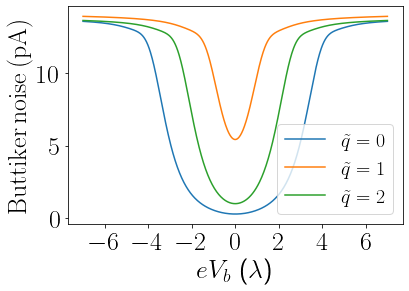

In [15]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$eV_b$ ($\lambda$)')
ax.set_ylabel(r'${\rm Buttiker \, noise}\, (\rm pA)$')
ax.set_xticks(np.array([-6*lam,-4*lam,-2*lam,0,2*lam,4*lam,6*lam]), labels=['$-6$','$-4$', '$-2$', '$0$', '$2$', '$4$','$6$'])
plt.plot(v_ax,corr0tab,label=r'$\tilde{q}=0$')
plt.plot(v_ax,corr1tab,label=r'$\tilde{q}=1$')
plt.plot(v_ax,corr2tab,label=r'$\tilde{q}=2$')
plt.legend(loc='lower right',fontsize=20)
plt.show()

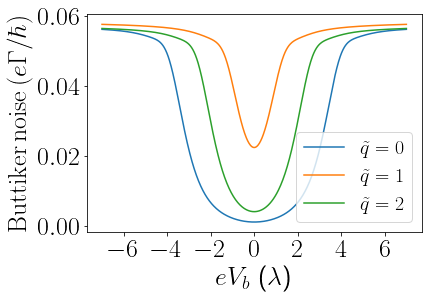

In [16]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$eV_b$ ($\lambda$)')
ax.set_ylabel(r'${\rm Buttiker \, noise}\, (e\Gamma/\hbar)$')
ax.set_xticks(np.array([-6*lam,-4*lam,-2*lam,0,2*lam,4*lam,6*lam]), labels=['$-6$','$-4$', '$-2$', '$0$', '$2$', '$4$','$6$'])
plt.plot(v_ax,corr0tabGam,label=r'$\tilde{q}=0$')
plt.plot(v_ax,corr1tabGam,label=r'$\tilde{q}=1$')
plt.plot(v_ax,corr2tabGam,label=r'$\tilde{q}=2$')
plt.legend(loc='lower right',prop={'size':20})
plt.show()

In [18]:
NVhalf=round(NV/2)
dV=Vmax/NVhalf
Itab0pos=[0]
cu=0
for k in range(NVhalf+1,NV+1):
    curr=cu+dV*G0arr[k,0]
    cu=curr
    Itab0pos.append(cu)
    
Itab0neg=[]
cu=0
for k in range(1,NVhalf+1):
    curr=cu-dV*G0arr[NVhalf-k,0]
    cu=curr
    Itab0neg.append(cu)

Itab0neg.reverse()
Itab0=(Itab0neg+Itab0pos)
Itab0scale=[value*(0.1602/np.pi) for value in Itab0] 
Itab0Gam=[value/(2.4e2*2*((np.pi)**2)) for value in Itab0]

In [19]:
NVhalf=round(NV/2)
dV=Vmax/NVhalf
Itab1pos=[0]
cu=0
for k in range(NVhalf+1,NV+1):
    curr=cu+dV*G1arr[k,0]
    cu=curr
    Itab1pos.append(cu)
    
Itab1neg=[]
cu=0
for k in range(1,NVhalf+1):
    curr=cu-dV*G1arr[NVhalf-k,0]
    cu=curr
    Itab1neg.append(cu)

Itab1neg.reverse()
Itab1=Itab1neg+Itab1pos
Itab1scale=[value*(0.1602/np.pi) for value in Itab1]
Itab1Gam=[value/(2.4e2*2*((np.pi)**2)) for value in Itab1]

In [20]:
NVhalf=round(NV/2)
dV=Vmax/NVhalf
Itab2pos=[0]
cu=0
for k in range(NVhalf+1,NV+1):
    curr=cu+dV*G2arr[k,0]
    cu=curr
    Itab2pos.append(cu)
    
Itab2neg=[]
cu=0
for k in range(1,NVhalf+1):
    curr=cu-dV*G2arr[NVhalf-k,0]
    cu=curr
    Itab2neg.append(cu)

Itab2neg.reverse()
Itab2=Itab2neg+Itab2pos
Itab2scale=[value*(0.1602/np.pi) for value in Itab2] 
Itab2Gam=[value/(2.4e2*2*((np.pi)**2)) for value in Itab2]

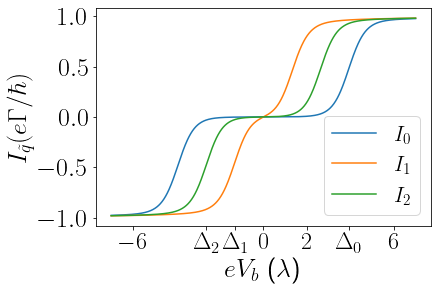

In [21]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$eV_b$ ($\lambda$)')
ax.set_ylabel(r'$I_{\tilde{q}} (e\Gamma/\hbar)$')
ax.set_xticks(np.array([-6*lam,0,2*lam,6*lam,Del1,Del2,Del0]), labels=['$-6$','$0$','$2$','$6$', r'$\Delta_1$', r'$\Delta_2$',r'$\Delta_0$'],fontsize=24)
ax.set_yticks(np.array([-1,-0.5,0,0.5,1]))
plt.plot(v_ax,Itab0Gam,label='$I_0$')
plt.plot(v_ax,Itab1Gam,label='$I_1$')
plt.plot(v_ax,Itab2Gam,label='$I_2$')
plt.legend(loc='lower right',fontsize=22)
plt.show()

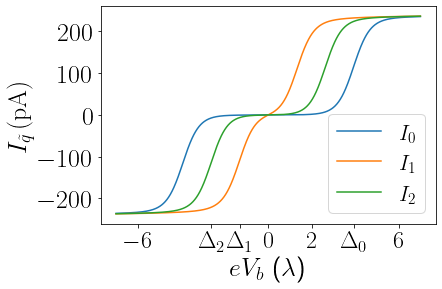

In [22]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$eV_b$ ($\lambda$)')
ax.set_ylabel(r'$I_{\tilde{q}}\, (\rm pA)$')
ax.set_xticks(np.array([-6*lam,0,2*lam,6*lam,Del1,Del2,Del0]), labels=['$-6$','$0$','$2$','$6$', r'$\Delta_1$', r'$\Delta_2$',r'$\Delta_0$'],fontsize=24)
ax.set_yticks(np.array([-200,-100,0,100,200]))
plt.plot(v_ax,Itab0scale,label='$I_0$')
plt.plot(v_ax,Itab1scale,label='$I_1$')
plt.plot(v_ax,Itab2scale,label='$I_2$')
plt.legend(loc='lower right',fontsize=22)
plt.show()

In [23]:
print(Itab0Gam[-1],Itab0scale[-1])

0.9757528023622225 235.71836988789795


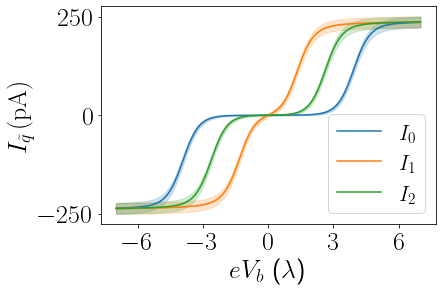

In [26]:
sigplus0=np.add(Itab0scale,corr0tab)
sigminus0=np.subtract(Itab0scale,corr0tab)
sigplus1=np.add(Itab1scale,corr1tab)
sigminus1=np.subtract(Itab1scale,corr1tab)
sigplus2=np.add(Itab2scale,corr2tab)
sigminus2=np.subtract(Itab2scale,corr2tab)
fig, ax = plt.subplots()
ax.set_xlabel(r'$eV_b$ ($\lambda$)')
ax.set_ylabel(r'$I_{\tilde{q}}\, (\rm pA)$')
ax.set_xticks(np.array([-6*lam,-3*lam,0,3*lam,6*lam]), labels=['$-6$','$-3$','$0$', '$3$','$6$'])
ax.set_yticks(np.array([-250,0,250]))
ax.plot(v_ax,Itab0scale,label='$I_0$', color='tab:blue')
ax.fill_between(v_ax, Itab0scale, sigplus0, alpha=0.2, color='tab:blue')
ax.fill_between(v_ax, Itab0scale, sigminus0, alpha=0.2, color='tab:blue')
ax.plot(v_ax,Itab1scale,label='$I_1$', color='tab:orange')
ax.fill_between(v_ax, Itab1scale, sigplus1, alpha=0.2, color='tab:orange')
ax.fill_between(v_ax, Itab1scale, sigminus1, alpha=0.2, color='tab:orange')
ax.plot(v_ax,Itab2scale,label='$I_2$', color='tab:green')
ax.fill_between(v_ax, Itab2scale, sigplus2, alpha=0.2, color='tab:green')
ax.fill_between(v_ax, Itab2scale, sigminus2, alpha=0.2, color='tab:green')
plt.legend(loc='lower right',prop={'size':22})
plt.show()

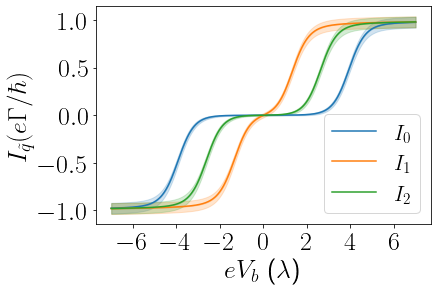

In [27]:
sigplus0=np.add(Itab0Gam,corr0tabGam)
sigminus0=np.subtract(Itab0Gam,corr0tabGam)
sigplus1=np.add(Itab1Gam,corr1tabGam)
sigminus1=np.subtract(Itab1Gam,corr1tabGam)
sigplus2=np.add(Itab2Gam,corr2tabGam)
sigminus2=np.subtract(Itab2Gam,corr2tabGam)
fig, ax = plt.subplots()
ax.set_xlabel(r'$eV_b$ ($\lambda$)')
ax.set_ylabel(r'$I_{\tilde{q}} (e\Gamma/\hbar)$')
ax.set_xticks(np.array([-6*lam,-4*lam,-2*lam,0,2*lam,4*lam,6*lam]), labels=['$-6$','$-4$', '$-2$', '$0$', '$2$', '$4$','$6$'])
ax.set_yticks(np.array([-1,-0.5,0,0.5,1]))
ax.plot(v_ax,Itab0Gam,label='$I_0$', color='tab:blue')
ax.fill_between(v_ax, Itab0Gam, sigplus0, alpha=0.2, color='tab:blue')
ax.fill_between(v_ax, Itab0Gam, sigminus0, alpha=0.2, color='tab:blue')
ax.plot(v_ax,Itab1Gam,label='$I_1$', color='tab:orange')
ax.fill_between(v_ax, Itab1Gam, sigplus1, alpha=0.2, color='tab:orange')
ax.fill_between(v_ax, Itab1Gam, sigminus1, alpha=0.2, color='tab:orange')
ax.plot(v_ax,Itab2Gam,label='$I_2$', color='tab:green')
ax.fill_between(v_ax, Itab2Gam, sigplus2, alpha=0.2, color='tab:green')
ax.fill_between(v_ax, Itab2Gam, sigminus2, alpha=0.2, color='tab:green')
plt.legend(loc='lower right',fontsize=22)
plt.show()